# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

Capomulin has the most number of observed timepoints.
There is a strong correlation between mouse weight and average tumor, the heavier the mouse, the bigger the tumor.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_mice = len(combined_data_df["Mouse ID"].unique())
number_mice


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_data_df.loc[combined_data_df.duplicated(), "Mouse ID"].unique()
duplicate_mouse


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data_mouse = combined_data_df[combined_data_df["Mouse ID"].isin(duplicate_mouse)]
duplicate_data_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_mouse = combined_data_df[combined_data_df["Mouse ID"].isin(duplicate_mouse)==False]
cleaned_data_mouse.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_number_mice = len(cleaned_data_mouse["Mouse ID"].unique())
clean_number_mice


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#mean
mean_drug = cleaned_data_mouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
mean_drug

#median
median_drug = cleaned_data_mouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
median_drug

#variance
variance_drug = cleaned_data_mouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
variance_drug

#standard deviation
std_drug = cleaned_data_mouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
std_drug

#sem
sem_drug = cleaned_data_mouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
sem_drug

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame ({"Mean Tumor Volume": mean_drug,
                                   "Median Tumor Volume": median_drug,
                                   "Tumor Volume Variance": variance_drug,
                                   "Tumor Volume Std. Dev.": std_drug,
                                   "Tumor Volume Std. Err.": sem_drug})
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
agg_sum_stat = cleaned_data_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg({"mean", "median", "var", "std", "sem"})
agg_sum_stat


,var,median,std,sem,mean
Drug Regimen,,,,,
Capomulin,24.947764,41.557809,4.994774,0.329346,40.675741
Ceftamin,39.290177,51.776157,6.268188,0.469821,52.591172
Infubinol,43.128684,51.820584,6.567243,0.492236,52.884795
Ketapril,68.553577,53.698743,8.279709,0.603860,55.235638
Naftisol,66.173479,52.509285,8.134708,0.596466,54.331565
Placebo,61.168083,52.288934,7.821003,0.581331,54.033581
Propriva,43.852013,50.446266,6.622085,0.544332,52.320930
Ramicane,23.486704,40.673236,4.846308,0.320955,40.216745
Stelasyn,59.450562,52.431737,7.710419,0.573111,54.233149


## Bar and Pie Charts

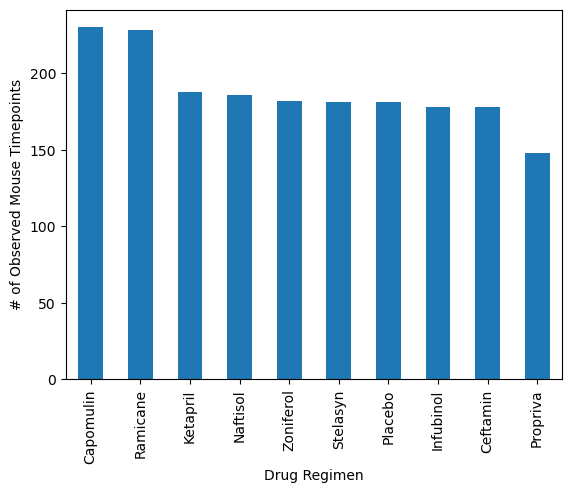

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
cleaned_data_bar = cleaned_data_mouse["Drug Regimen"].value_counts()
cleaned_data_bar.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


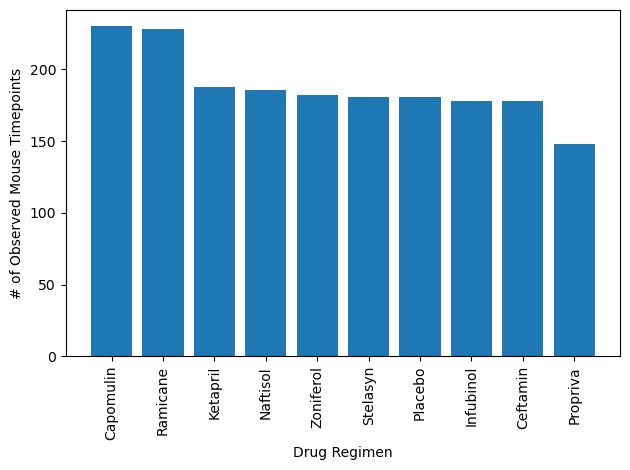

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
cleaned_data_bar = cleaned_data_mouse["Drug Regimen"].value_counts()
plt.bar(cleaned_data_bar.index.values,cleaned_data_bar.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Sex')

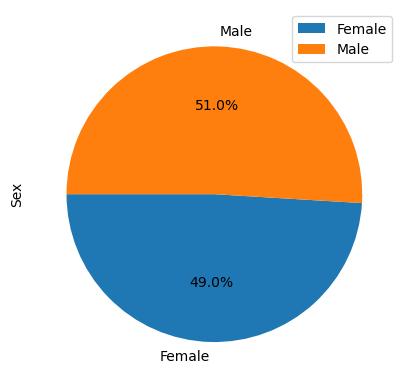

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#get sex values
gender_pie = cleaned_data_mouse.groupby("Sex").count()
gender_pie

pie_gender = gender_pie.plot(kind="pie", y="Mouse ID", autopct="%1.1f%%", startangle = 180)
pie_gender.set_ylabel("Sex")


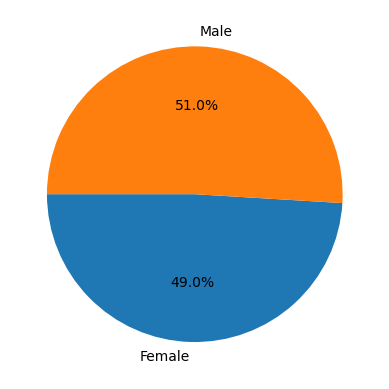

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y = np.array([922, 958])
mylabels = ["Female", "Male"]

#chart using pyplot
plt.pie(y, labels = mylabels, autopct="%1.1f%%", startangle = 180)
plt.show() 

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

#final_tumor_vol 
max_tumor = cleaned_data_mouse.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(cleaned_data_mouse, how="left", on=["Mouse ID", "Timepoint"])


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


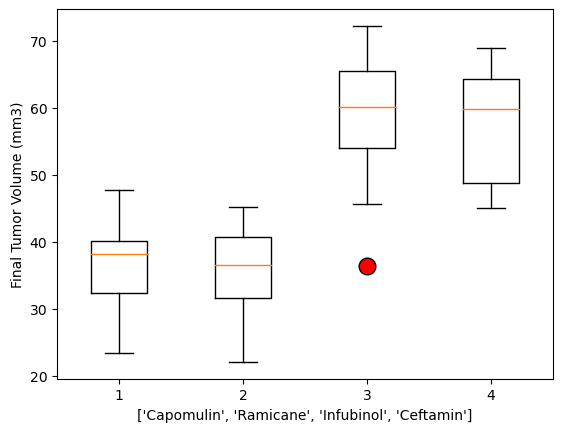

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_xlabel (treatment_drugs)
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_list, flierprops = dict(marker = "o", markersize = 12.0, markerfacecolor = "red"))
plt.show()


## Line and Scatter Plots

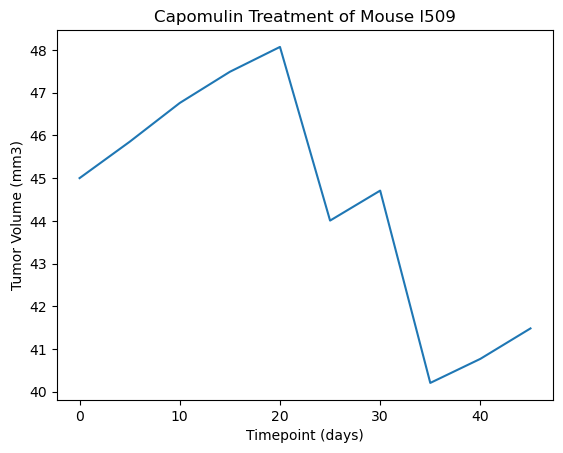

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#filter by mouse id
mouse_id = "l509"
mouse_id_data = cleaned_data_mouse.loc[cleaned_data_mouse["Mouse ID"] == mouse_id]
mouse_id_data

#filter by drug
capomulin_data = mouse_id_data.loc[mouse_id_data["Drug Regimen"] == "Capomulin"]
capomulin_data

#create lineplot
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], linestyle="-")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment of Mouse {mouse_id}")
plt.show()

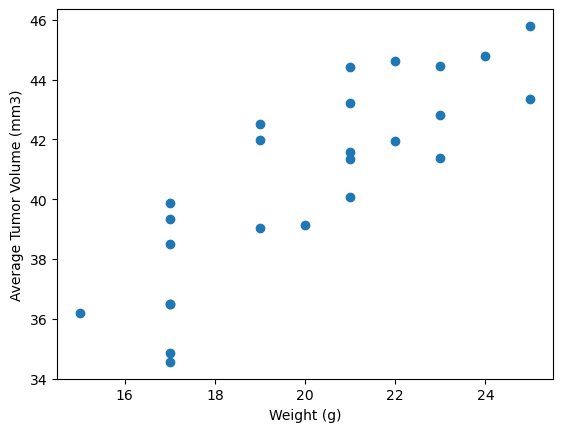

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#filter capomulin
capomulin_data = cleaned_data_mouse.loc[cleaned_data_mouse["Drug Regimen"] == "Capomulin"]
capomulin_data

#get average tumor
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
average_tumor_volume

#get mouse weight
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
mouse_weight

#generate scatter plot
plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


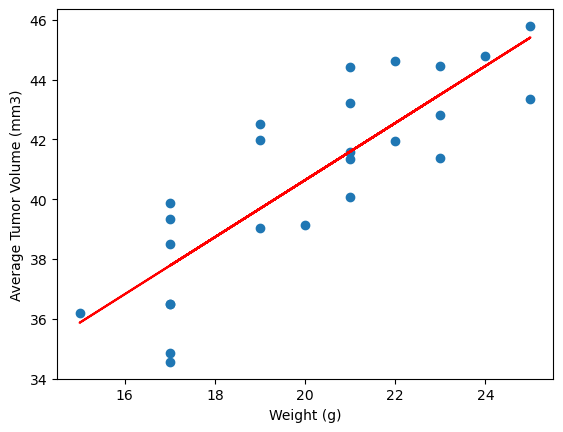

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#calculate correlation
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

# Add the linear regression equation and line to plot
x_values = mouse_weight
y_values = average_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
